## Part 3 Content
* Import Libraries
* Load myData CSV File
* Q3: Which directors, writers, actors and actresses make the most profit (Medium Budget)?
* Q4: Which genres make the most profit (Medium Budget)?

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from functions import *

## Load myData CSV File

In [2]:
#myData.csv file is created in Part 1 python file. It combined all required data.
df = pd.read_csv('zippedData/myData.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53305 entries, 0 to 53304
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         53305 non-null  int64  
 1   release_date       53305 non-null  object 
 2   movie              53305 non-null  object 
 3   production_budget  53305 non-null  float64
 4   domestic_gross     53305 non-null  float64
 5   worldwide_gross    53305 non-null  float64
 6   tconst             53305 non-null  object 
 7   genres             53265 non-null  object 
 8   averagerating      53305 non-null  float64
 9   numvotes           53305 non-null  int64  
 10  nconst             53305 non-null  object 
 11  category           53305 non-null  object 
 12  characters         21488 non-null  object 
 13  primary_name       53305 non-null  object 
 14  death_year         1243 non-null   float64
 15  release_year       53305 non-null  int64  
 16  profit_gross       533

In [3]:
#df[df.primary_name =='Emma Thompson']

## Q3: Which directors, writers, actors and actresses make the most profit? (Medium budget)

In [4]:
# Copy dataframe with selected columns
selected_columns2 = ['category', 'primary_name', 'death_year', 'movie', 'production_budget', 'profit_gross', 'profit_rate', 'release_year']
df2 = df[selected_columns2].copy() ## Select columns

# Clean duplicates
df2.drop_duplicates(subset=None, keep='first', inplace=True)

#Select the movies with production_budget > $100,000,000
df2 = df2[(df2.production_budget > 20000000) & (df2.production_budget <= 100000000)]

# Remove the dead people
df2 = df2[df2.death_year.isnull()]

#Drop the movies with release year before 1990
df2.drop(df2[df2.release_year < 1990].index, inplace=True)

print(df2.shape)
df2.head(20)

(8267, 8)


,category,primary_name,death_year,movie,production_budget,profit_gross,profit_rate,release_year
6397,producer,Gary Barber,NaN,The Tourist,100000000.0,178731369.0,2.787314,2010
6398,producer,Patrick Crowley,NaN,The Other Guys,100000000.0,70936470.0,1.709365,2010
6399,actor,Chris Hemsworth,NaN,In the Heart of the Sea,100000000.0,-10306691.0,0.896933,2015
6401,producer,Barry Levine,NaN,Hercules,100000000.0,143388614.0,2.433886,2014
6403,producer,Riza Aziz,NaN,The Wolf of Wall Street,100000000.0,289870414.0,3.898704,2013
6405,director,Florian Henckel von Donnersmarck,NaN,The Tourist,100000000.0,178731369.0,2.787314,2010
6410,actor,Biswajit Chakraborty,NaN,Hercules,100000000.0,143388614.0,2.433886,2014
6414,actor,Joseph Fiennes,NaN,Hercules,100000000.0,143388614.0,2.433886,2014
6418,director,Brett Ratner,NaN,Hercules,100000000.0,143388614.0,2.433886,2014
6420,writer,Steve Moore,NaN,Hercules,100000000.0,143388614.0,2.433886,2014


Total number: 134
Best director List:  ['Chris Renaud', 'Genndy Tartakovsky', 'Paul Feig', 'Phil Lord', 'Olivier Megaton', 'Steve Martino', 'Jake Kasdan', 'Pierre Coffin', 'James Foley', 'Kyle Balda', 'Christopher Miller']


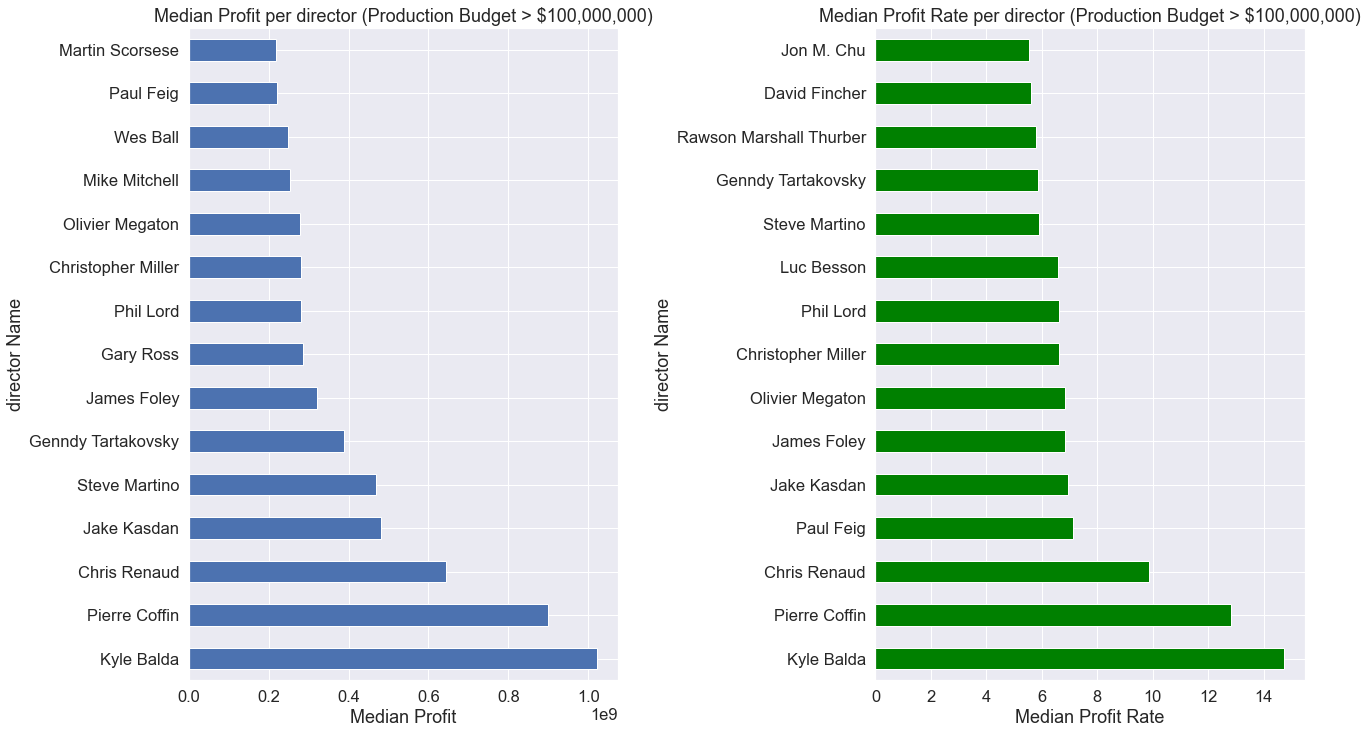

In [8]:
# Director, call function
categoryStudy(df2, 'director', 15, 12, 'med')

Total number: 218
Best writer List:  ['Wellesley Wild', 'Chris McKenna', 'Niall Leonard', 'Alec Sulkin', 'Erik Sommers', 'Craig Mazin', 'Dan Hageman', 'Robert Mark Kamen', 'Kevin Hageman', 'Billy Ray', 'Anthony McCarten', 'Cinco Paul', 'E.L. James', 'Brian Lynch', 'Stephenie Meyer', 'Ken Daurio']


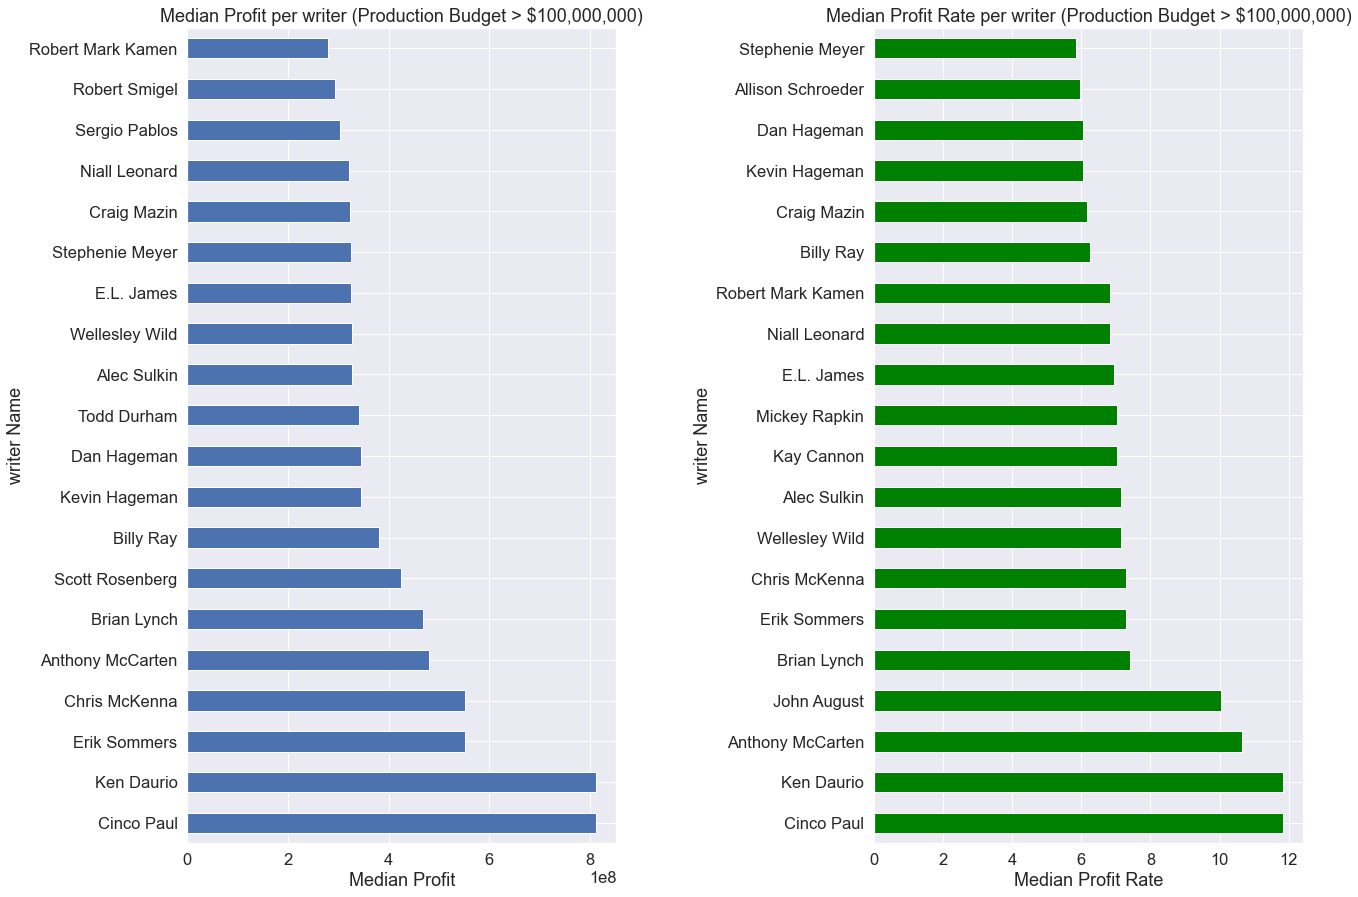

In [9]:
# Writer, call function
categoryStudy(df2, 'writer', 20, 15, 'med')

In [10]:
df2[df2.primary_name == 'Selena Gomez']

,category,primary_name,death_year,movie,production_budget,profit_gross,profit_rate,release_year
8020,actress,Selena Gomez,NaN,Hotel Transylvania,85000000.0,293505812.0,4.453010,2012
8582,actress,Selena Gomez,NaN,Hotel Transylvania 2,80000000.0,389500298.0,5.868754,2015
10775,actress,Selena Gomez,NaN,Hotel Transylvania 3: Summer Vacation,65000000.0,462079962.0,8.108922,2018


Total number: 321
Best actor List:  ['Bradley Cooper', 'Denis Leary', 'Marwan Kenzari', 'Ed Skrein', "Dylan O'Brien", 'Eric Stonestreet', 'Aziz Ansari', 'Neil Patrick Harris', 'Andy Samberg', 'Seth MacFarlane', 'Taylor Lautner', 'Eric Johnson', 'Jamie Dornan', 'Benjamin Bratt', 'Thomas Brodie-Sangster', 'Michael Keaton']


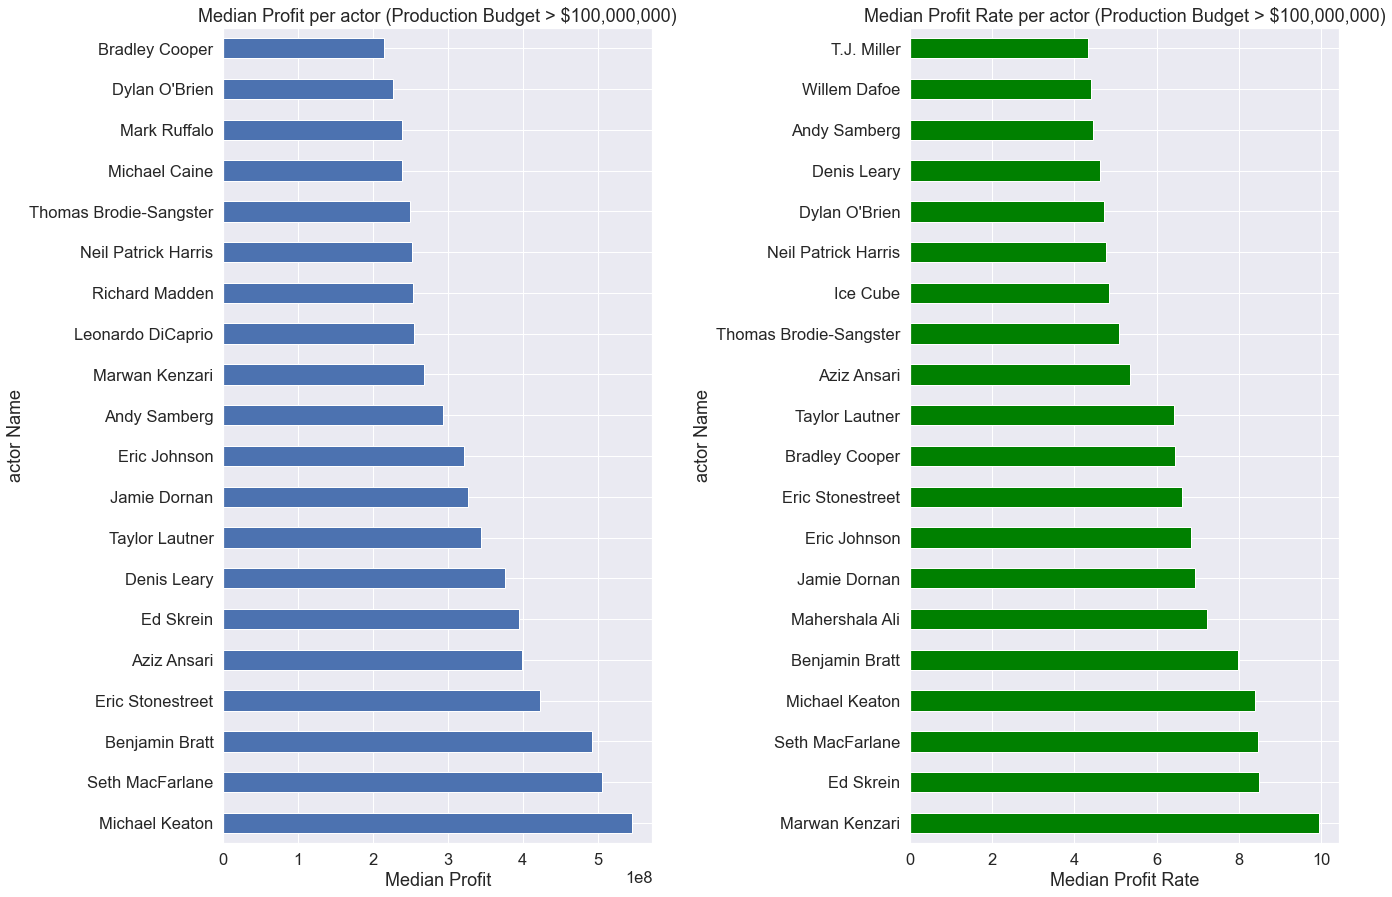

In [11]:
# Actor, call function
categoryStudy(df2, 'actor', 20, 15, 'med')

Total number: 167
Best actress List:  ['Kristen Wiig', 'Sandra Bullock', 'Jennifer Lawrence', 'Eloise Mumford', 'Jennifer Ehle', 'Hailee Steinfeld', 'Dakota Johnson', 'Famke Janssen', 'Selena Gomez', 'Ali Larter', 'Miranda Cosgrove']


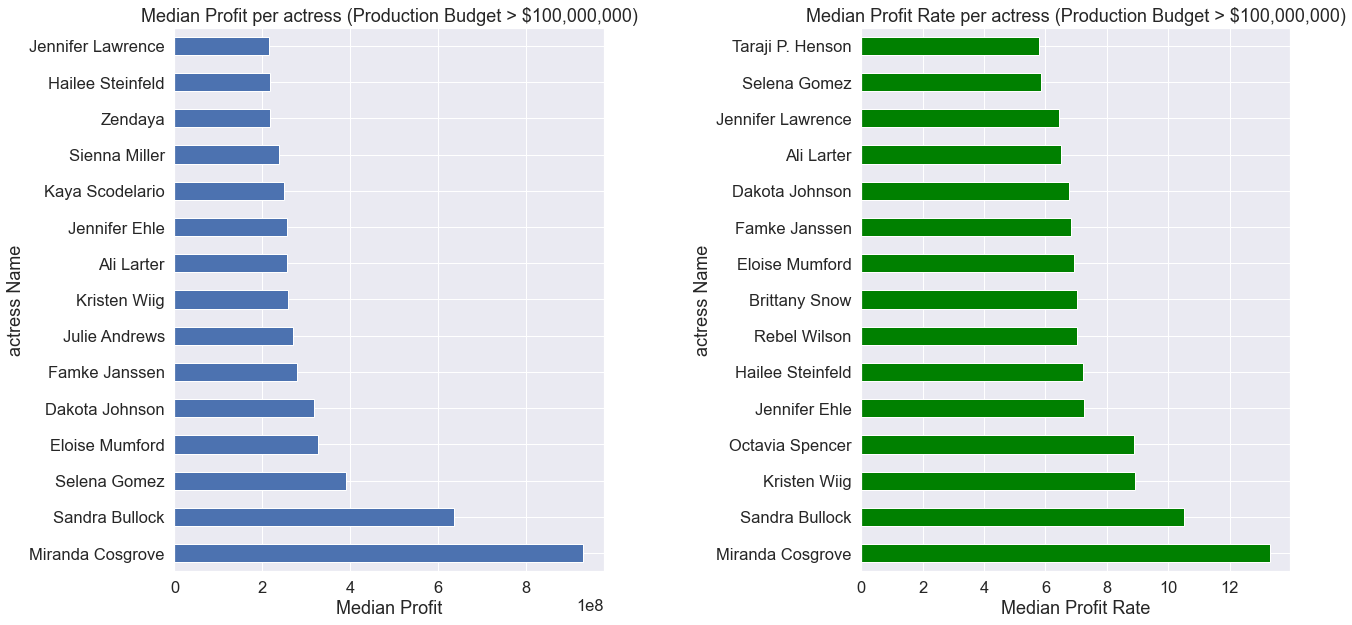

In [12]:
# Actress, call function
categoryStudy(df2, 'actress', 15, 10, 'med')

## Q4: Which genre brings highest profit? (medium budget)

In [13]:
# Copy dataframe with selected columns
selected_columns3 = ['movie', 'production_budget', 'genres', 'profit_gross', 'profit_rate', 'release_year']
df3 = df[selected_columns3].copy() ## Select columns

# Clean duplicates
df3.drop_duplicates(subset=None, keep='first', inplace=True)

#Select the movies with production_budget > $100,000,000
df3 = df3[(df3.production_budget > 20000000) & (df3.production_budget <= 100000000)]

#Drop the movies with release date before 1990
df3.drop(df3[df3.release_year < 1990].index, inplace=True)

print(df3.shape)
df3.head(20)

(2019, 6)


,movie,production_budget,genres,profit_gross,profit_rate,release_year
6397,The Tourist,100000000.0,Action,178731369.0,2.787314,2010
6398,The Other Guys,100000000.0,Crime,70936470.0,1.709365,2010
6399,In the Heart of the Sea,100000000.0,Adventure,-10306691.0,0.896933,2015
6400,In the Heart of the Sea,100000000.0,Action,-10306691.0,0.896933,2015
6401,Hercules,100000000.0,Adventure,143388614.0,2.433886,2014
6402,Hercules,100000000.0,Action,143388614.0,2.433886,2014
6403,The Wolf of Wall Street,100000000.0,Crime,289870414.0,3.898704,2013
6404,The Other Guys,100000000.0,Action,70936470.0,1.709365,2010
6406,The Tourist,100000000.0,Thriller,178731369.0,2.787314,2010
6407,The Tourist,100000000.0,Adventure,178731369.0,2.787314,2010


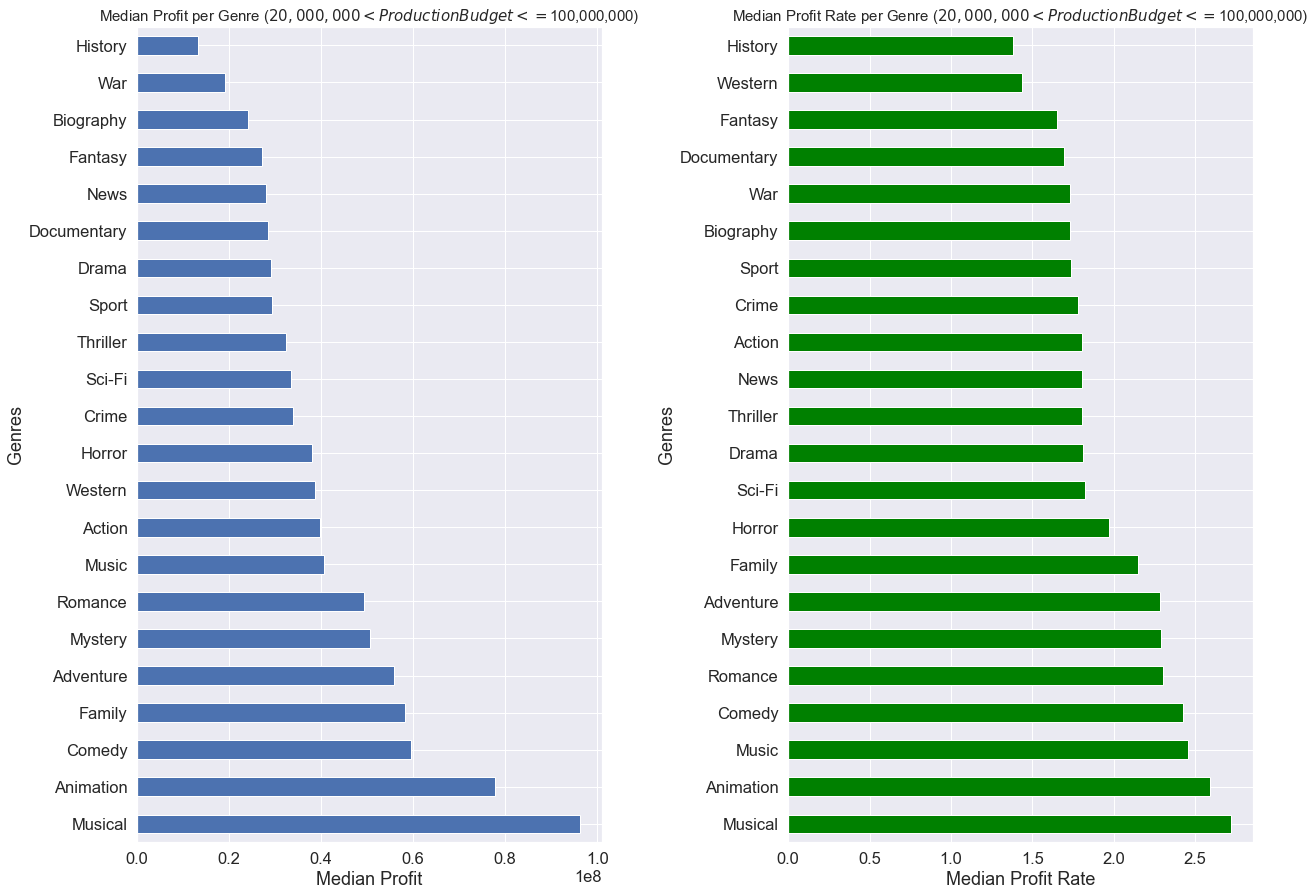

In [14]:
# Plot genres
genre_series1 = df3.groupby('genres')['profit_gross'].median().sort_values(ascending=False)
genre_series2 = df3.groupby('genres')['profit_rate'].median().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(20, 15))
plt.subplots_adjust(wspace=0.4)
sns.set(font_scale=1.5)

genre_series1.plot.barh(ax=axes[0])
axes[0].set_title('Median Profit per Genre ($20,000,000 < Production Budget <= $100,000,000)', fontsize=15)
axes[0].set_xlabel('Median Profit')
axes[0].set_ylabel('Genres')

genre_series2.plot.barh(ax=axes[1], color='green')
axes[1].set_title('Median Profit Rate per Genre ($20,000,000 < Production Budget <= $100,000,000)', fontsize=15)
axes[1].set_xlabel('Median Profit Rate')
axes[1].set_ylabel('Genres')

plt.savefig('figures/genres-profit1_medBudget.png')

In [15]:
df3.groupby('genres').count().sort_values(by='movie', ascending=False)

,movie,production_budget,profit_gross,profit_rate,release_year
genres,,,,,
Drama,366,366,366,366,366
Comedy,272,272,272,272,272
Action,265,265,265,265,265
Adventure,168,168,168,168,168
Thriller,157,157,157,157,157
Crime,150,150,150,150,150
Romance,85,85,85,85,85
Biography,84,84,84,84,84
Horror,66,66,66,66,66


In [16]:
#df3[df3.genres == 'Music']

In [17]:
# Select the popular genres names with higher number of movies
popular_genres = list(df3.groupby('genres').count().sort_values(by='movie', ascending=False)[0:18].index)
popular_genres

['Drama',
 'Comedy',
 'Action',
 'Adventure',
 'Thriller',
 'Crime',
 'Romance',
 'Biography',
 'Horror',
 'Mystery',
 'Animation',
 'Fantasy',
 'Sci-Fi',
 'Family',
 'Documentary',
 'History',
 'Sport',
 'Music']

In [18]:
# Filter the data for the popular genres
df3_pop = df3.loc[df3['genres'].isin(popular_genres)]
df3_pop

,movie,production_budget,genres,profit_gross,profit_rate,release_year
6397,The Tourist,100000000.0,Action,178731369.0,2.787314,2010
6398,The Other Guys,100000000.0,Crime,70936470.0,1.709365,2010
6399,In the Heart of the Sea,100000000.0,Adventure,-10306691.0,0.896933,2015
6400,In the Heart of the Sea,100000000.0,Action,-10306691.0,0.896933,2015
6401,Hercules,100000000.0,Adventure,143388614.0,2.433886,2014
...,...,...,...,...,...,...
26849,Kidnap,21000000.0,Drama,13836080.0,1.658861,2017
26862,Kidnap,21000000.0,Crime,13836080.0,1.658861,2017
27021,Pulse,20500000.0,Fantasy,9741435.0,1.475192,2006
27022,Pulse,20500000.0,Drama,9741435.0,1.475192,2006


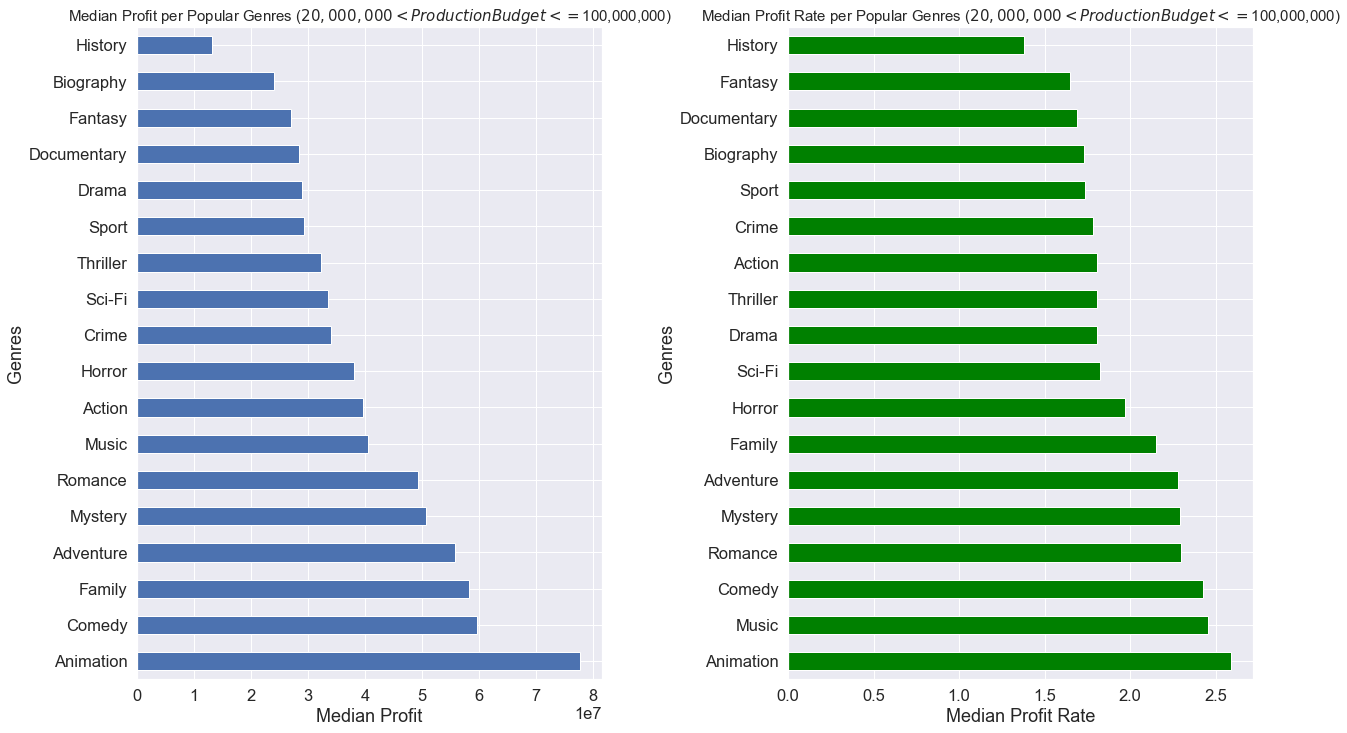

In [19]:
# plots for popular genres
genre_series1 = df3_pop.groupby('genres')['profit_gross'].median().sort_values(ascending=False)
genre_series2 = df3_pop.groupby('genres')['profit_rate'].median().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(20, 12))
plt.subplots_adjust(wspace=0.4)
sns.set(font_scale=1.5)

genre_series1.plot.barh(ax=axes[0])
axes[0].set_title('Median Profit per Popular Genres ($20,000,000 < Production Budget <= $100,000,000)', fontsize=15)
axes[0].set_xlabel('Median Profit')
axes[0].set_ylabel('Genres')

genre_series2.plot.barh(ax=axes[1], color='green')
axes[1].set_title('Median Profit Rate per Popular Genres ($20,000,000 < Production Budget <= $100,000,000)', fontsize=15)
axes[1].set_xlabel('Median Profit Rate')
axes[1].set_ylabel('Genres')

plt.savefig('figures/genres-profit2_medBudget.png')